In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()
alt.themes.enable('opaque')
df_train = pd.read_csv('../data/raw/train_lofi_rowid_Nov13.csv')
df_test = pd.read_csv('../data/raw/test_lofi_rowid_Nov13.csv')

df_train.head()

,row_id,well_id,GR,label
0,0,0,99.005617,0
1,1,0,105.563944,0
2,2,0,105.921065,0
3,3,0,113.513354,0
4,4,0,101.523783,0


## Find templates for each label

In [2]:
wells = np.arange(20,40)
df_sub = df_train[df_train['well_id'].isin(wells)]


In [25]:
label = 1
df_sub_label = df_sub[df_sub['label'].isin([label])]
df_sub_label['row_id_diff'] = df_sub_label['row_id'].diff()
df_sub_label['groups'] = (df_sub_label['row_id_diff'] != df_sub_label['row_id_diff'].shift()).cumsum()
df_sub_label['row_id_norm'] = df_sub_label['row_id'] - df_sub_label.groupby(['groups'])['row_id'].transform(np.min)

/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is t

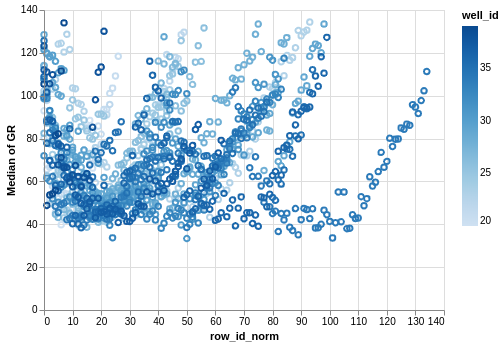

In [26]:
alt.Chart(data=df_sub_label).encode(x='row_id_norm',y='median(GR)',color='well_id').mark_point()

In [24]:
from sklearn.linear_model import LinearRegression

def rolling_slope(x):
    model_ols = LinearRegression()
    idx = np.arange(x.shape[0])
    model_ols.fit(idx.reshape(-1, 1), x.reshape(-1, 1))
    res,r2 = model_ols.coef_[0],model_ols.score(idx.reshape(-1, 1), x.reshape(-1, 1))
    return [res,r2]

x = df_sub_label.iloc[:300,:]['GR'].rolling(10,center=True,min_periods =2).apply(rolling_slope,axis=1)

TypeError: apply() got an unexpected keyword argument 'axis'

In [18]:
x.head(20)



22000   -0.191897
22001   -0.252105
22002   -0.288383
22003    0.034467
22004    0.346084
22005    0.772330
22006    0.060041
22007   -0.035928
22008    0.026703
22009   -0.547375
22010   -0.805546
22011   -0.740863
22012   -0.934435
22013   -0.954910
22014   -0.375416
22015    0.615708
22016    0.111194
22017    0.037798
22018    0.099959
22019    0.776171
Name: GR, dtype: float64